<a href="https://colab.research.google.com/github/vvamsi91/HGR_Project/blob/main/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import kagglehub
gti_upm_leapgestrecog_path = kagglehub.dataset_download('gti-upm/leapgestrecog')

print('Data source import complete.')


100%|██████████| 2.13G/2.13G [00:30<00:00, 74.7MB/s]

Extracting files...


Data source import complete.


In [2]:
import os
import numpy as np
import pandas as pd

# Define the input directory
input_dir = '/kaggle/input'

# Explore the directory structure
file_list = []
for root, _, files in os.walk(input_dir):
    for file in files:
        file_path = os.path.join(root, file)
        file_list.append(file_path)

print("Images are downloaded.")


Images are downloaded.


In [3]:
# Standard Libraries
import os
import random
import warnings

# Data Manipulation & Processing
import numpy as np
import pandas as pd
from PIL import Image
import cv2

# Visualization
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Deep Learning with TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


In [13]:
path='/kaggle/input/leapgestrecog/leapGestRecog/'
folders=os.listdir(path)
images = []
labels = []
for folder in folders:
    folder_path = os.path.join(path,folder)
    subfolders = os.listdir(folder_path)
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path,subfolder)

        for img in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path,img)
            images.append(img_path)
            labels.append(subfolder)





In [14]:
len(images)

20000

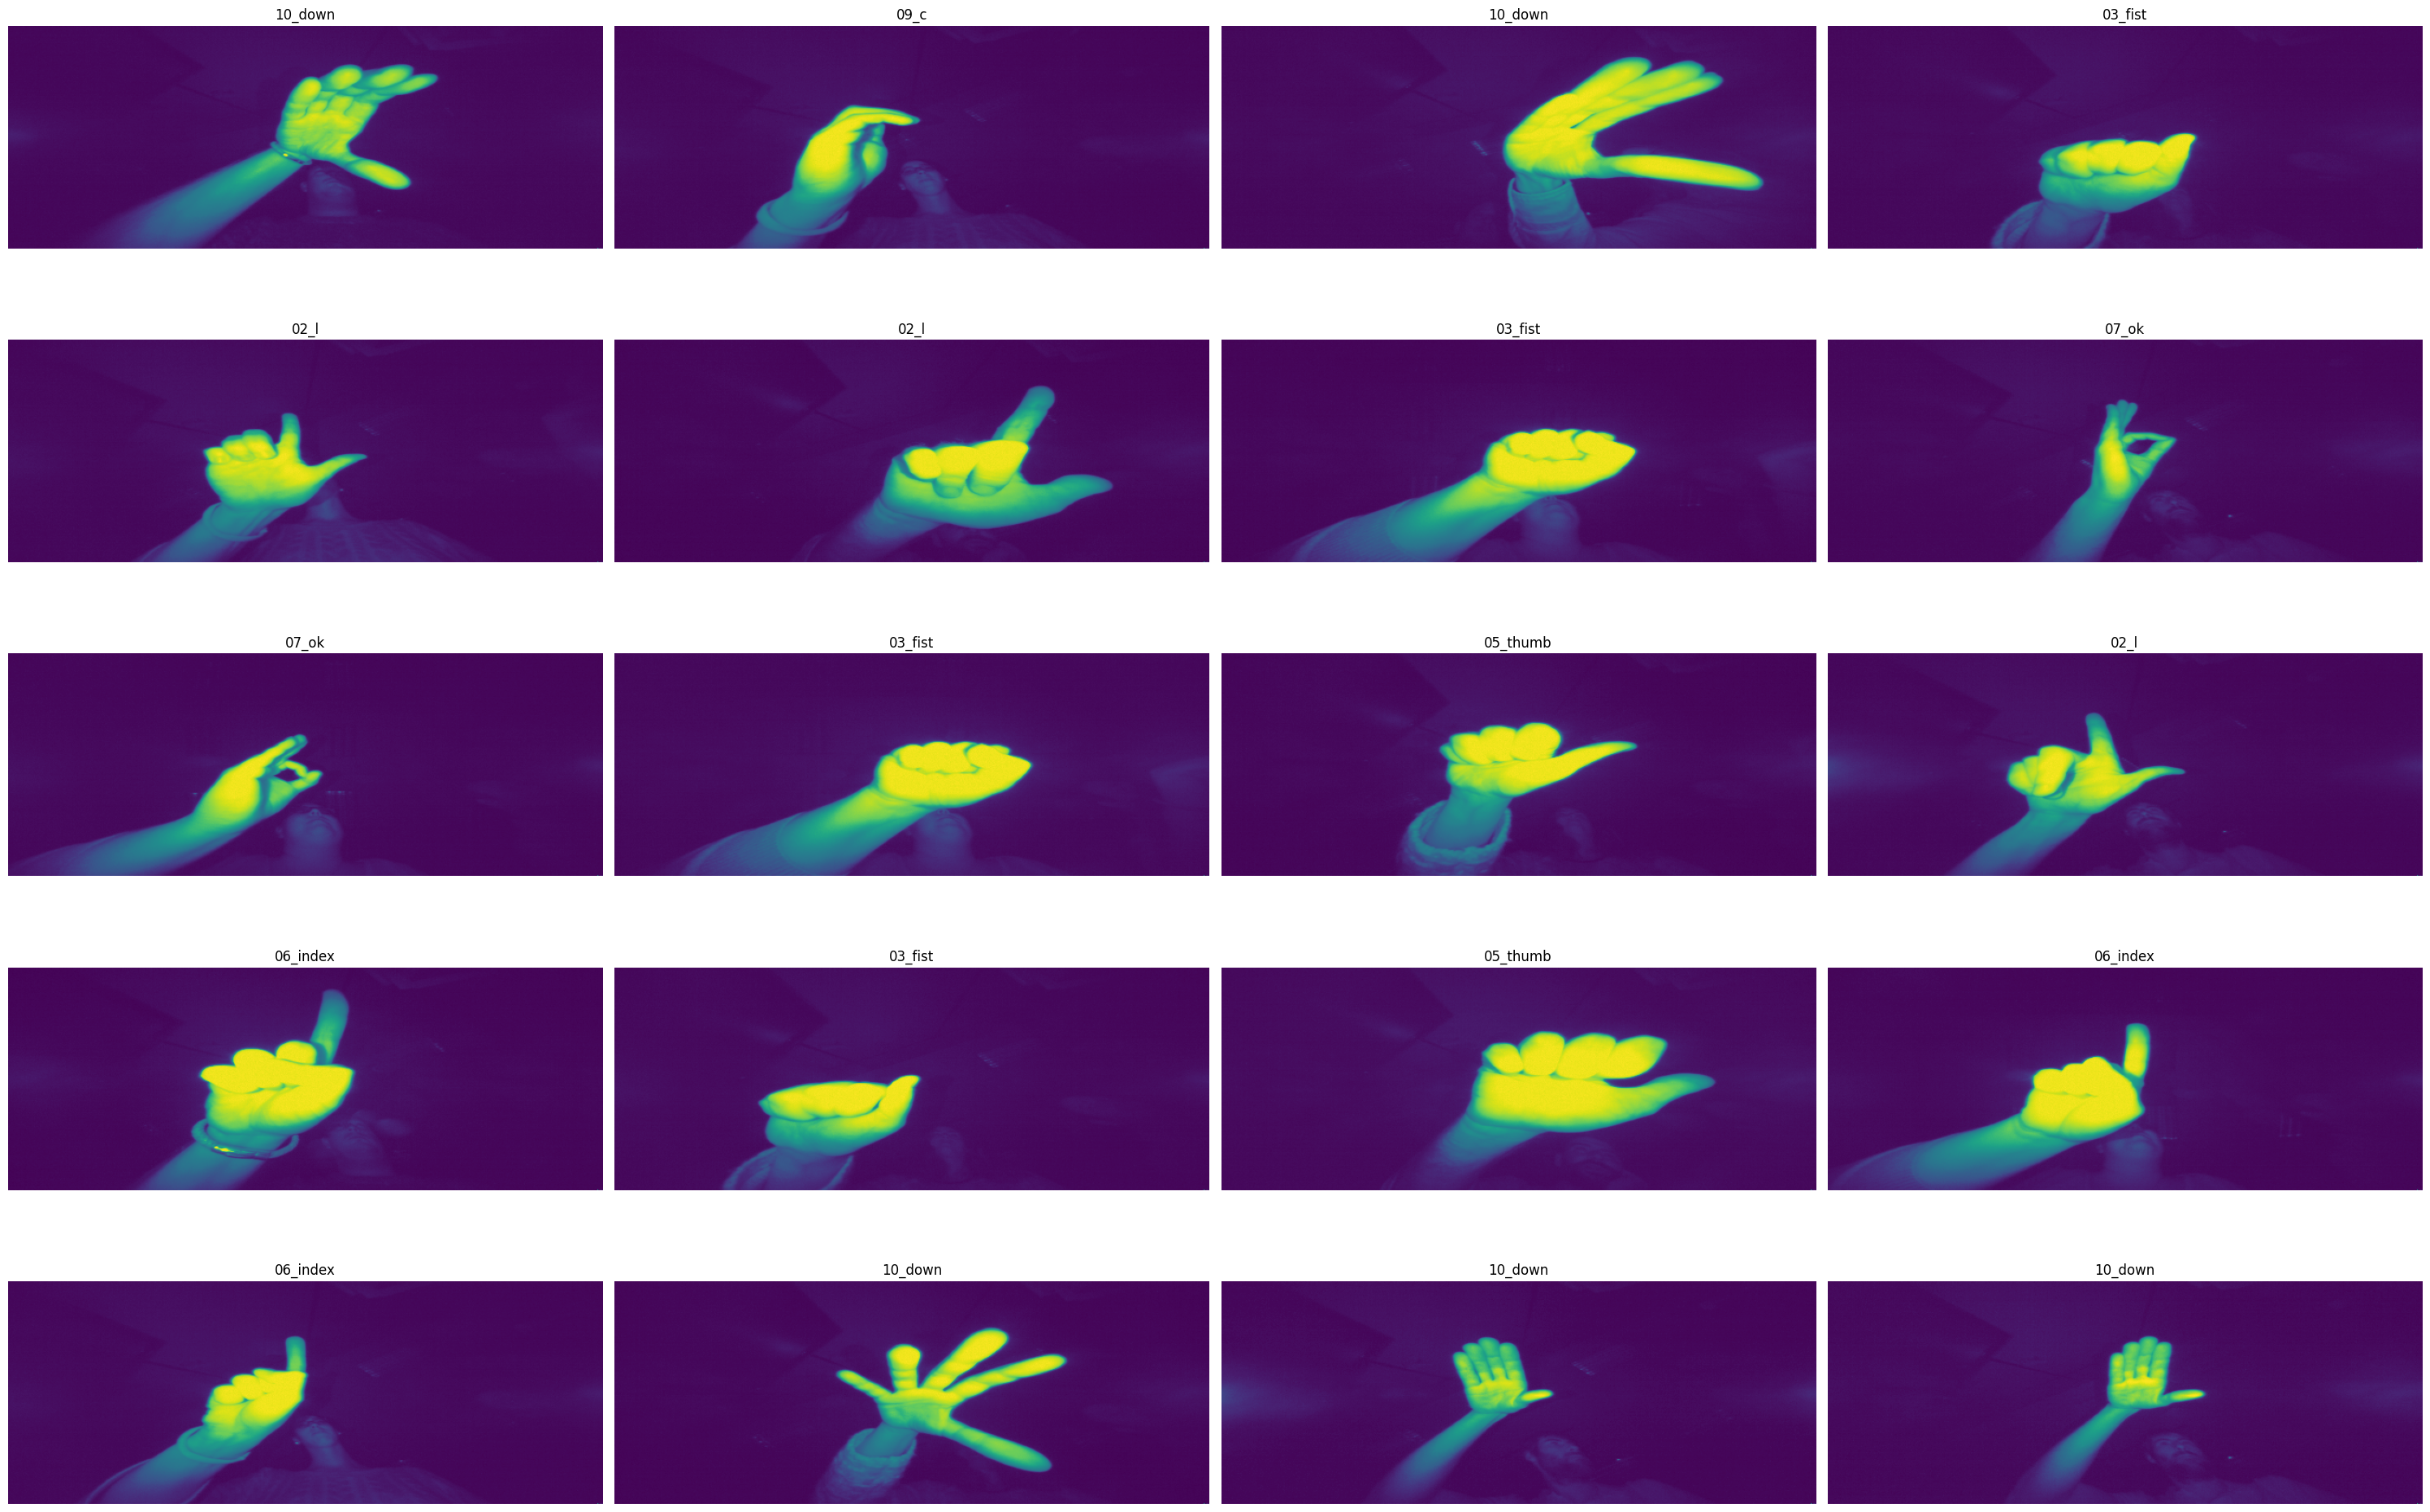

In [15]:
# Display 20 random images with their labels
fig, axes = plt.subplots(5, 4, figsize=(30, 20))
axes = axes.flatten()

sample_indices = random.sample(range(len(images)), 20)
for idx, i in enumerate(sample_indices):
    img = Image.open(images[i])
    axes[idx].imshow(np.array(img))
    axes[idx].set_title(labels[i])
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Create DataFrame and encode labels
df = pd.DataFrame({'images': images, 'labels': labels})
label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['labels'])

# Resize and normalize images
img_size = (64, 64)
x = []
y = to_categorical(np.array(df['labels']))

for img_path in df['images']:
    img = Image.open(img_path).convert('RGB')
    img = img.resize(img_size)
    img_array = np.array(img) / 255.0
    x.append(img_array)

x = np.array(x, dtype='float32')




In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=54)

In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])





In [23]:
# Compile the CNN model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop]
)

"""
# Display model structure and performance
print("Model Architecture:")
model.summary()

print("\nEvaluating Model on Test Set...")
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Generate predictions and decode classes
y_pred = np.argmax(model.predict(x_test), axis=1)
"""


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 170s 330ms/step - accuracy: 0.9877 - loss: 0.0665 - val_accuracy: 0.9973 - val_loss: 0.0144
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 202s 332ms/step - accuracy: 0.9906 - loss: 0.0668 - val_accuracy: 0.9942 - val_loss: 0.0577
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 199s 326ms/step - accuracy: 0.9914 - loss: 0.0490 - val_accuracy: 0.9992 - val_loss: 0.0142
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 329ms/step - accuracy: 0.9941 - loss: 0.0437 - val_accuracy: 0.9992 - val_loss: 0.0071
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 202s 329ms/step - accuracy: 0.9928 - loss: 0.0520 - val_accuracy: 0.9475 - val_loss: 0.3474
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 200s 325ms/step - accuracy: 0.9949 - loss: 0.0329 - val_accuracy: 0.9952 - val_loss: 0.0212
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 328ms/step - accuracy: 0.9958 - loss: 0.0204 - val_accuracy: 0.9747 - val_loss: 0.1097
Epoch 7: early stopping
Restoring model weights from the end of the best epo

'\n# Display model structure and performance\nprint("Model Architecture:")\nmodel.summary()\n\nprint("\nEvaluating Model on Test Set...")\nloss, accuracy = model.evaluate(x_test, y_test)\nprint(f"Test Loss: {loss}")\nprint(f"Test Accuracy: {accuracy}")\n\n# Generate predictions and decode classes\ny_pred = np.argmax(model.predict(x_test), axis=1)\n'

In [24]:
print("*MODEL SUMMARY*")
model.summary()

print("TEST RESULTS")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss     : {loss}")
print(f"Test Accuracy : {accuracy}")

print("MODEL PREDICTIONS")
probs = model.predict(x_test)
y_pred = np.argmax(probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print(f"Predicted class count : {len(np.unique(y_pred))}")
print(f"Actual class count    : {len(np.unique(y_true))}")

print("CLASSIFICATION REPORT")
print(classification_report(y_true, y_pred))



*MODEL SUMMARY*


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,923,808 (14.97 MB)

 Trainable params: 1,307,786 (4.99 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2,615,574 (9.98 MB)

TEST RESULTS
Test Loss     : 0.007120033726096153
Test Accuracy : 0.9992499947547913
MODEL PREDICTIONS
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step
Predicted class count : 10
Actual class count    : 10
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00       383
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       407
           4       1.00      1.00      1.00       391
           5       1.00      1.00      1.00       384
           6       1.00      1.00      1.00       435
           7       1.00      1.00      1.00       410
           8       1.00      1.00      1.00       427
           9       1.00      1.00      1.00       397

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



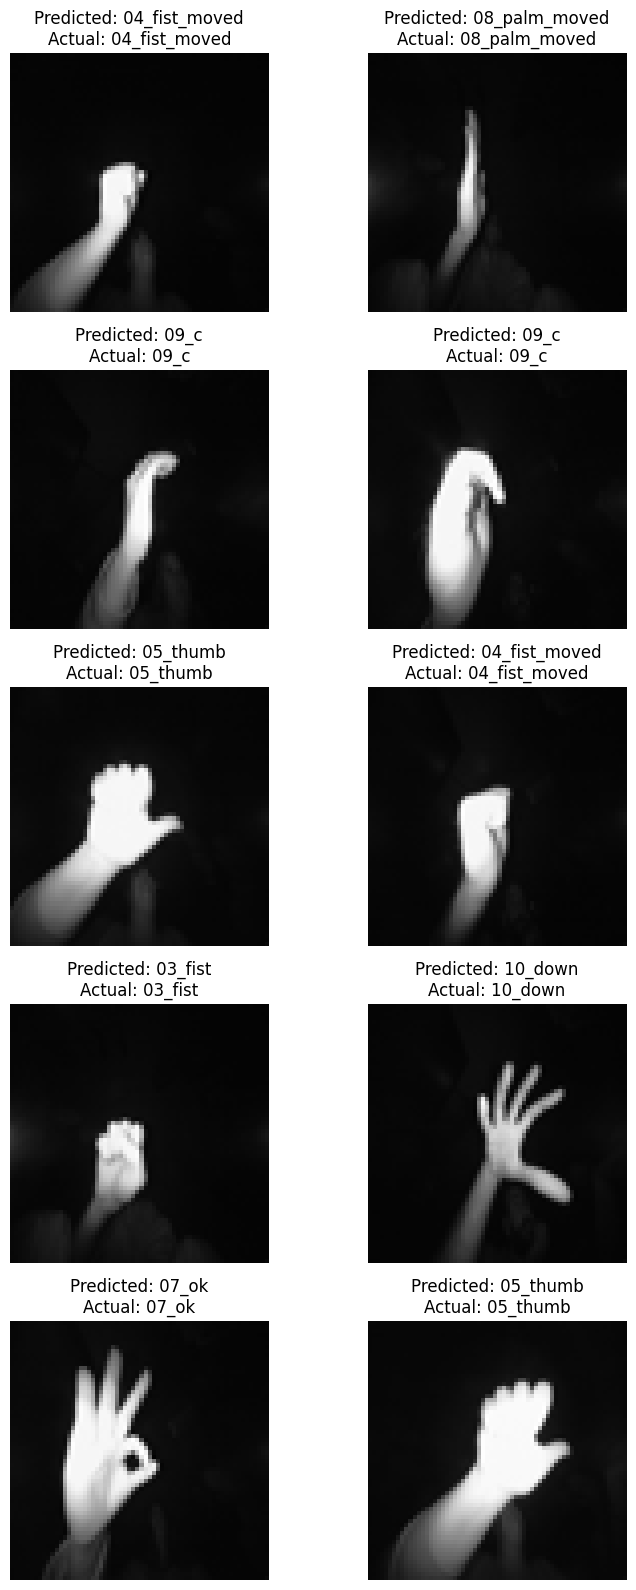

In [26]:
random_indices = random.sample(range(len(x_test)), 10)

fig, axes = plt.subplots(5, 2, figsize=(8, 16))
axes = axes.flatten()

for i, idx in enumerate(random_indices):
    img = x_test[idx]
    actual_class = np.argmax(y_test[idx])
    predicted_class = y_pred[idx]

    actual_label = label_encoder.inverse_transform([actual_class])[0]
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]

    axes[i].imshow(img)
    axes[i].set_title(f"Predicted: {predicted_label}\nActual: {actual_label}", fontsize=12)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

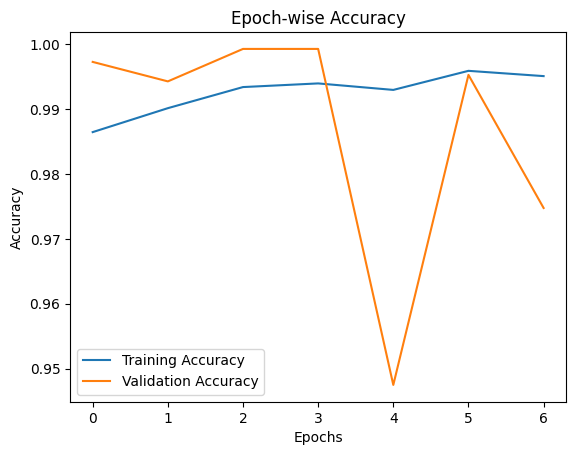

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch-wise Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



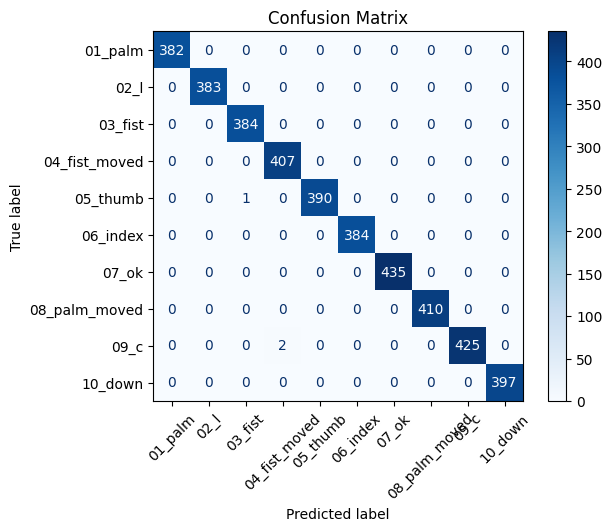

In [30]:
y_true = np.argmax(y_test, axis=1)
y_pred = y_pred

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [32]:
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       382
         02_l       1.00      1.00      1.00       383
      03_fist       1.00      1.00      1.00       384
04_fist_moved       1.00      1.00      1.00       407
     05_thumb       1.00      1.00      1.00       391
     06_index       1.00      1.00      1.00       384
        07_ok       1.00      1.00      1.00       435
08_palm_moved       1.00      1.00      1.00       410
         09_c       1.00      1.00      1.00       427
      10_down       1.00      1.00      1.00       397

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000

